<a href="https://colab.research.google.com/github/Marcosias0400/Optimizacion/blob/main/Optimizacion_grad1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema: \\
EL precio de un sistema de energía solar es dado por: \\
U=35A+108V \\
donde A es la superficie del colector y V es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se puede considerar que: \\
A(290-100/V)=5833.3 \\
Adicionalmente el volúmen de la batería V está relacionado a la temperatura de operación del sistema T. y esta configurado tal que: \\
V=50/(T-20) \\
Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados. Se desea optimizar el costo U considerando las limitaciones presentadas.

Solucion: \\
Juntando todas las expresiones y expresando en términos de T tenemos la siguiente ecuación: \\
U=204615.5/(330-2T) + 10400/(T-20)

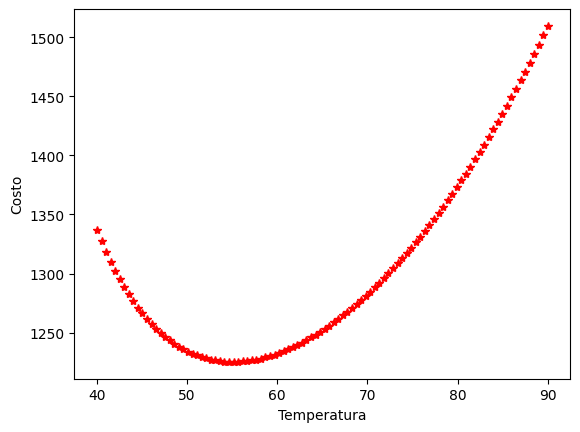

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
a=40
b=90
T=np.linspace(a,b,100)
U=204165.5/(330-2*T) + 10400/(T-20)
plt.figure()
plt.plot(T,U,'*r')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.show()

Métodos Basados en gradiente \\
Puesto que en estos se nesecita calcular la derivada, se utilizara python para derivar la siguiente ecuación: \\
U=204165.5/(330-2T) + 10400/(T-20) \\
Entonces la primera y la segunda derivada se puede calcular de la siguiente manera:

In [9]:
import sympy as sy
def calcularGradiente():
  T=sy.Symbol('T')
  fu=204165.5/(330-2*T) + 10400/(T-20)
  d1fu=sy.diff(fu)
  print(fu)
  print(d1fu)
  return None
calcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [12]:
def U(T):
  return 204165.5/(330-2*T) + 10400/(T-20)
U(55.08)

1225.1656408350887

In [14]:
def d1U(T):
  return -10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2
d1U(55.08)

-0.0022423688924249063